# Sampling

In this Notebook we'll:
1. Load our dataset
2. Convert this data-set into balanced class data-set.
3. Create five samples using the sample size detection formula
4. Apply five different sampling techniques ( Sampling1, Sampling2, Sampling3, Sampling4, Sampling5) on five different ML models (M1, M2, M3, M4 and M5)

## Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Creditcard_data.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


Text(0, 0.5, 'Count')

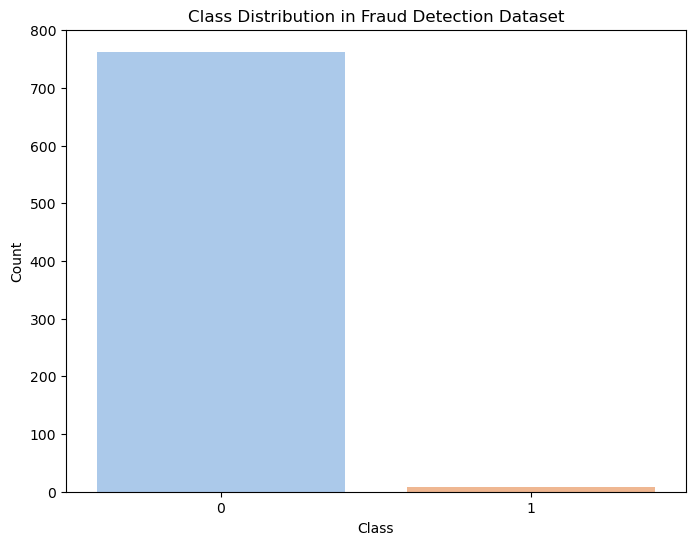

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='pastel')
plt.title('Class Distribution in Fraud Detection Dataset')
plt.xlabel('Class')
plt.ylabel('Count')

In [4]:
class_count_0, class_count_1 = df['Class'].value_counts()

class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (763, 31)
class 1: (9, 31)


As we observe that there is a clear imbalance in our dataset. The "non-fraud" class has a much higher number of sample compared to "fraud" class. This can greatly affect our model's accuracy to detect frauds. So we will create the new dataset with balanced class distribution using techniques we have studied i.e. oversampling of minority class or undersampling of majority class

## Balancing Class Distribution

### Random Undersampling
Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

total class of 1 and0: Class
0    9
1    9
Name: count, dtype: int64


Text(0, 0.5, 'Count')

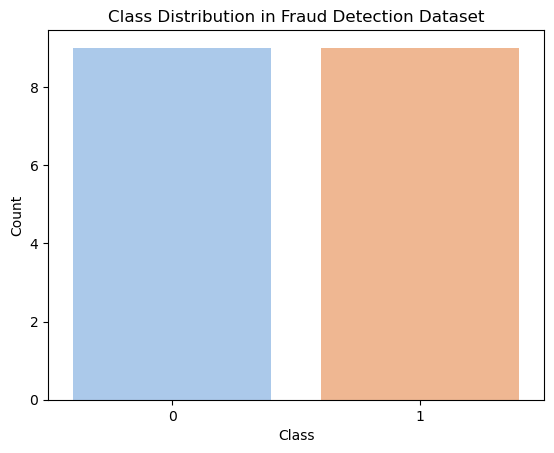

In [5]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Class'].value_counts())
sns.countplot(x='Class', data=test_under, palette='pastel')
plt.title('Class Distribution in Fraud Detection Dataset')
plt.xlabel('Class')
plt.ylabel('Count')

### Random Oversampling
Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

total class of 1 and 0: Class
1    763
0    763
Name: count, dtype: int64


Text(0, 0.5, 'Count')

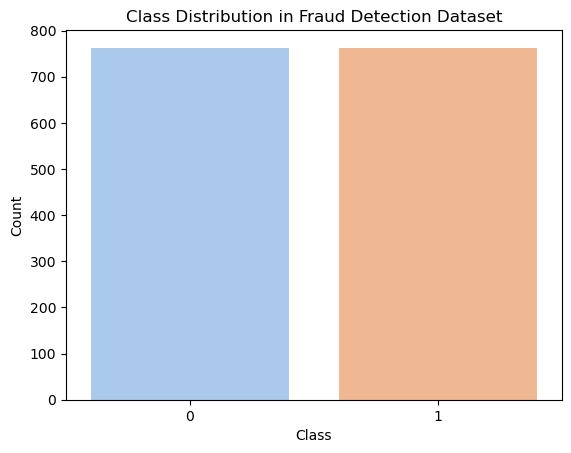

In [6]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['Class'].value_counts())
sns.countplot(x='Class', data=test_over, palette='pastel')
plt.title('Class Distribution in Fraud Detection Dataset')
plt.xlabel('Class')
plt.ylabel('Count')

In [7]:
test_over.shape

(1526, 31)

Unlike under-sampling, this method leads to no information loss. So we'll be using oversampling dataset for sampling and training our models.

## Sampling
We have to create 5 samples using 5 different Sampling techniques. The techniques we'll be using:
1. Simple Random Sampling
2. Systematic sampling
3. Stratified Sampling
4. Cluster Sampling
5. Bootstrap sampling

In [8]:
#confidence value
C=0.95
#margin of error
E=0.05
#Z-score based on confidence value
Z=1.96
#estimated proportion of population
p=0.5
#population size
ps=test_over.shape[0]

In [9]:
#SAMPLE:1 - Simple Random Sampling

#size of sample
n1=round(((Z**2)*p*(1-p))/(E**2))
print("rounded value of size of sample 1:",n1)

#Generate sample
sample1 = test_over.sample(n=n1, random_state=42)

rounded value of size of sample 1: 384


In [10]:
sample1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
682,514,-0.878340,0.489031,2.914341,0.078154,-0.423732,0.090021,0.289963,0.085451,0.040902,...,-0.037353,0.236372,-0.197062,0.584250,0.190462,0.305561,0.122975,-0.088435,36.61,0
244,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
250,171,-0.365532,1.006932,1.108304,-0.428694,0.590513,0.105474,0.602926,0.132310,-0.636398,...,-0.250031,-0.663325,-0.189399,-0.845682,-0.055760,0.124845,0.263525,0.099579,0.89,0
639,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
372,271,-0.689738,1.086091,1.260978,-0.386675,0.023899,-1.138914,0.752138,-0.027374,-0.032902,...,-0.230010,-0.747300,0.011255,0.282653,-0.449785,-0.087427,0.182553,0.202336,5.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,549,1.422461,-0.547422,-0.147438,-0.615979,-0.677018,-0.825597,-0.295487,-0.237954,-0.639154,...,0.122827,0.342161,-0.236404,-0.077528,0.828618,-0.034126,-0.017271,0.000946,30.00,0
244,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
314,227,-1.465381,1.382172,1.019790,0.250367,1.011414,-1.281807,1.186866,-0.312608,-0.701503,...,-0.038147,0.083481,-0.266017,0.270833,0.754353,-0.491529,-0.689819,-0.329374,1.00,0
105,69,-2.220642,1.029181,-0.697724,-1.268226,2.802221,3.322901,0.197036,-0.521297,0.859596,...,0.110448,-1.178463,0.508911,0.923385,0.213759,0.033507,-0.142025,-0.263844,9.47,0


In [11]:
#SAMPLE:2 - Systematic Sampling

#size of sample
n2=round(((Z**2)*p*(1-p))/(E**2))
print("rounded value of size of sample 2:",n2)

#intervals
k = ps // n1
print("Interval size:",k)

#Generate sample
sample2 = df.iloc[0::k]

rounded value of size of sample 2: 384
Interval size: 3


In [12]:
sample2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
12,10,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,571,-2.990622,2.962638,-0.980844,0.071904,-1.795238,-1.335733,-1.143681,2.134599,-0.377240,...,-0.184759,-0.890628,0.278109,0.301391,0.137764,0.103233,0.052097,0.001938,9.99,0
762,572,1.063195,-1.156247,-0.814094,-0.462132,1.137835,3.909057,-1.116745,0.920514,-0.600150,...,-0.205083,-0.434832,-0.220055,0.991996,0.631624,-0.223179,0.052542,0.053525,158.00,0
765,574,1.178364,0.444453,-0.398723,0.724486,0.123439,-0.753883,0.161412,0.004017,-0.306011,...,-0.055267,-0.147937,-0.026551,0.113747,0.412081,0.371214,-0.026679,0.023272,0.76,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0


Although the formula for calculating sample size is: 
```n3=((Z**2)*p*(1-p))/((E/s)**2)```

But we'll take a different approach for this:
1. divide the dataset according to 'Class' variable (stratas)
2. perform simple random sampling on both stratas 
3. combine both samples into one.

In [13]:
#SAMPLE:3 - Statified Sampling

#generate samples
strata1=test_over[test_over['Class']==0]
strata2=test_over[test_over['Class']==1]

n11=round(((Z**2)*p*(1-p))/(E**2))
print("sample size from each strata:",n11)

sample_11 = strata1.sample(n=n11, random_state=42)
sample_12 = strata2.sample(n=n11, random_state=42)

#combine the samples
sample3 = pd.concat([sample_11, sample_12], axis=0)

sample size from each strata: 384


In [14]:
sample3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
360,265,-0.491003,0.906953,1.645423,-0.083531,-0.195560,-0.710165,0.559119,0.116340,-0.538190,...,-0.168067,-0.517387,0.018650,0.491652,-0.277795,0.043841,0.253372,0.111749,9.03,0
262,184,-0.143256,0.743649,1.534072,1.062170,0.208187,-0.838623,0.524151,-0.294661,-0.478856,...,-0.205014,-0.460893,0.047407,0.339243,-0.779439,0.234456,-0.024125,-0.049898,1.98,0
757,566,1.166360,0.005061,0.497768,0.798920,-0.365524,-0.233421,-0.074210,-0.008325,0.437687,...,-0.195728,-0.365798,0.030729,0.123133,0.381749,0.296735,-0.007175,0.011905,18.56,0
195,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
336,246,-1.069200,1.239963,0.545157,1.005354,-0.025696,-0.910673,0.422442,0.049283,-0.564601,...,0.146555,0.602990,0.132656,0.427113,-0.084030,-0.417194,-0.897885,-0.462042,2.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
639,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
699,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1


In [15]:
#SAMPLE:5 - Bootstrap Sampling

#size of sample
n12=round(((Z**2)*p*(1-p))/(E**2))
print("sample size:",n12)

#Generate sample
sample5=test_over.iloc[np.random.randint(ps, size=n12)]

sample size: 384


In [16]:
sample5

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
232,155,-0.546215,0.878084,1.523176,-0.242853,0.323931,0.371852,0.446595,0.370077,-0.631359,...,-0.120936,-0.268618,0.036313,-0.312671,-0.378051,0.113660,0.292121,0.103730,6.45,0
699,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
340,250,-1.337375,1.109391,1.396223,0.038718,0.520267,-0.259157,0.806329,-0.016192,0.425314,...,-0.200431,-0.116354,-0.398652,-0.034692,0.444578,-0.489118,0.259927,0.065547,5.96,0
225,147,-2.687978,4.390230,-2.360483,0.360829,1.310192,-1.645253,2.327776,-1.727825,4.324752,...,-1.045961,-0.156951,0.079854,-0.012598,0.207194,-0.536578,0.950393,-0.624431,0.89,0
717,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
401,290,-5.166299,-5.449369,2.988498,2.658991,1.948152,-0.854470,-0.326394,-1.017364,1.983901,...,-1.297221,1.172278,3.150413,0.574081,1.018394,0.987099,0.658283,-1.609716,85.00,0
444,322,1.066134,0.037699,0.169035,0.991432,-0.354437,-0.143978,-0.293181,0.220900,0.450282,...,-0.087929,-0.097530,-0.057188,0.138768,0.379478,0.412382,0.005041,0.032502,29.56,0
694,524,-0.292211,0.838605,1.360847,-0.001346,0.350836,-0.894645,1.382872,-0.431655,-0.400719,...,0.095844,0.368186,-0.150624,0.391048,0.186411,-0.571952,-0.135755,-0.176200,52.05,0


In [17]:
#SAMPLE:4 - Cluster Sampling
#let's make 5 clusters
import random as rd



def sample_cluster(dataframe, clusters, state=None):
    print('define variables')
    length = len(dataframe)
    print(f'  - length: {length}')
    element_max = length / clusters
    print(f'  - elements by cluster: {element_max}')
    
    cluster_list = []
    cluster_id = 0
    element_count = 0
    
    print('define clusters')
    for _ in dataframe.iterrows():
        cluster_list.append(cluster_id)
        element_count += 1
        if element_count > (element_max - 1):
            element_count = 0
            cluster_id += 1
    
    dataframe['cluster'] = cluster_list
    print(' - cluster list')
    print(dataframe['cluster'].value_counts())
    print('')
    rd.seed(state)
    cluster_selected = rd.randint(0, clusters - 1)
    print('cluster selected:', cluster_selected)
    
    # Ensure that the final sample contains instances of both class 0 and class 1
    class_0_sample = dataframe[dataframe['cluster'] == cluster_selected].sample(frac=0.5, random_state=state)
    class_1_sample = dataframe[dataframe['cluster'] != cluster_selected].sample(frac=0.5, random_state=state)
    
    dataframe_clustered = pd.concat([class_0_sample, class_1_sample])
    
    dataframe_clustered = dataframe_clustered.drop('cluster', axis=1)
    
    print('cluster size:', dataframe_clustered.shape[0], '\n')
    return dataframe_clustered


sample4=sample_cluster(test_over,5)

define variables
  - length: 1526
  - elements by cluster: 305.2
define clusters
 - cluster list
cluster
0    305
1    305
2    305
3    305
4    305
5      1
Name: count, dtype: int64

cluster selected: 1
cluster size: 762 



In [18]:
sample4

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
639,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
699,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
244,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
766,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,44,-0.899992,0.136255,1.883665,-0.208996,1.051441,1.905241,0.241423,0.647631,-0.053466,...,-0.081500,-0.016926,-0.147706,-1.384620,-0.024352,0.412659,-0.106776,-0.190476,21.55,0
766,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
360,265,-0.491003,0.906953,1.645423,-0.083531,-0.195560,-0.710165,0.559119,0.116340,-0.538190,...,-0.168067,-0.517387,0.018650,0.491652,-0.277795,0.043841,0.253372,0.111749,9.03,0
456,333,-1.685987,-1.509042,1.257992,-0.114733,0.749404,-0.819917,0.119897,0.215608,0.015854,...,0.367582,0.306898,0.686077,-0.004033,-0.545436,0.172126,0.011342,0.213581,216.00,0


## Creating Models
Now we have to use each sample on a different ML classification models. The models we'll be using:
1. Logistic Regression
2. Decision Trees
3. Random Forest
4. Naive Bayes
5. XGBoost



### Model 1: Logistic Regression on Sample 1

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def logistic_regression(sample):
    
    X=sample.drop('Class',axis=1)
    y=sample['Class']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create a Logistic Regression model
    logreg_model = LogisticRegression()

    # Train the model
    logreg_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)


    # Print the results
    #print("Accuracy:",accuracy)
    return accuracy


### Model 2: Descision Trees for Sample 2

In [20]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree(sample):

    X=sample.drop('Class',axis=1)
    y=sample['Class']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Decision Tree model
    dt_model = DecisionTreeClassifier()

    # Train the model
    dt_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = dt_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)


    # Print the results
    #print("Accuracy:",accuracy)
    return accuracy


### Model 3: Random Forest for Sample 3

In [21]:
from sklearn.ensemble import RandomForestClassifier


def random_forest(sample):
    X=sample.drop('Class',axis=1)
    y=sample['Class']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    #print("Accuracy:",accuracy)
    return accuracy
    


### Model 4: Naive Bayes for Sample 4

In [22]:
from sklearn.naive_bayes import GaussianNB


def naive_bayes(sample):
    X=sample.drop('Class',axis=1)
    y=sample['Class']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Naive Bayes model (Gaussian Naive Bayes for continuous features)
    nb_model = GaussianNB()

    # Train the model
    nb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = nb_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    #print("Accuracy:",accuracy)
    return accuracy



### Model 5: XGBoost for Sample 5

In [23]:
pip install xgboost --quiet

Note: you may need to restart the kernel to use updated packages.


In [24]:
from xgboost import XGBClassifier


def xgboost_classifier(sample):
    X=sample.drop('Class',axis=1)
    y=sample['Class']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create an XGBoost classifier
    xgb_model = XGBClassifier()

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)


    # Print the results
    #print("Accuracy:",accuracy)
    return accuracy


## Make Accuracy table

In [25]:
samples = ['sample1', 'sample2', 'sample3', 'sample4', 'sample5']

# List of model functions
models = [logistic_regression, decision_tree, random_forest, naive_bayes, xgboost_classifier]

# Create a dictionary to store accuracies
accuracy_dict = {'Sample': samples}

# Populate the dictionary with accuracies for each model and sample
for model_func in models:
    model_name = model_func.__name__
    accuracies = [model_func(sample) for sample in [sample1, sample2, sample3, sample4, sample5]]
    accuracy_dict[model_name] = accuracies

# Create a DataFrame from the dictionary
acc_df = pd.DataFrame(accuracy_dict)


In [26]:
acc_df

,Sample,logistic_regression,decision_tree,random_forest,naive_bayes,xgboost_classifier
0,sample1,0.922078,0.987013,1.0,0.662338,0.974026
1,sample2,1.000000,1.000000,1.0,1.000000,1.000000
2,sample3,0.915584,1.000000,1.0,0.798701,1.000000
3,sample4,0.915033,0.986928,1.0,0.686275,0.993464
4,sample5,0.922078,0.987013,1.0,0.675325,1.000000


## Determine best Sampling technique using TOPSIS
Utilising TOPSIS to determine best sampling technique.

In [27]:
#topsis
def topsis(data,weights,impacts):
    #Step 1
    #removing first column that's usually the name of models/criteria
    df=data.drop(data.columns[0],axis=1)
    
    #Step2
    #check for any categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # if yes, Convert categorical columns to numeric using cat.codes
    df[categorical_columns] = df[categorical_columns].apply(lambda col: col.astype('category').cat.codes)
    
    #Step 3
    #Calculate root of square of sum for each column
    rss=[]
    for j in range(0,df.shape[1]):
        l=[]
        for i in range(0,df.shape[0]):
            l.append(df.iloc[i,j]**2)
        rss.append((sum(l))**0.5)
    
    #Step 4
    #Calculate normalized performance values
    for i in range(0,df.shape[1]):
        for j in range(0,df.shape[0]):
            df.iloc[j,i]=df.iloc[j,i]/rss[i]
    
    #Step 5
    #Calculate weighted normalised decision matrix
    for i in range(0,df.shape[1]):
        for j in range(0,df.shape[0]):
            df.iloc[j,i]=df.iloc[j,i]/weights[i]
    
    #Step 6
    #Extract ideal best and ideal worst for each column according to impact
    ideal_best=[]
    ideal_worst=[]
    for i in range(0,df.shape[1]):
            if impacts[i] == '+':
                ideal_best.append(max(df.iloc[:,i]))
                ideal_worst.append(min(df.iloc[:,i]))
            elif impacts[i] == '-':
                ideal_best.append(min(df.iloc[:,i]))
                ideal_worst.append(max(df.iloc[:,i]))
    
    #Step 7
    #Calculate euclidean distance for both ideal best and ideal worst value
    Sp=[]
    Sn=[]
    for i in range(0,df.shape[0]):
        l1=[]
        l2=[]
        for j in range(0,df.shape[1]):
            l1.append((df.iloc[i,j]-ideal_best[j])**2)
            l2.append((df.iloc[i,j]-ideal_worst[j])**2)
        Sp.append(sum(l1)**0.5)
        Sn.append(sum(l2)**0.5)
    
    #Step 8
    #Calculate performance score
    p=[]
    for i in range(0,len(Sp)):
        p.append(Sn[i]/(Sn[i]+Sp[i]))
    
    #Step 9
    #Create DataFrame
    df_new=pd.DataFrame(data)
    df_new['Performance Score']=p
    
    #Step 10
    #Calculate Rank based on performance score and add it to the dataframe
    df_new['Rank'] = df_new['Performance Score'].rank(ascending=False)
    
    return df_new

In [28]:
w=[1,1,1,1,1]
i=['+','+','+','+','+']
topsis(acc_df,w,i)

,Sample,logistic_regression,decision_tree,random_forest,naive_bayes,xgboost_classifier,Performance Score,Rank
0,sample1,0.922078,0.987013,1.0,0.662338,0.974026,0.016661,5.0
1,sample2,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0
2,sample3,0.915584,1.000000,1.0,0.798701,1.000000,0.393462,2.0
3,sample4,0.915033,0.986928,1.0,0.686275,0.993464,0.080944,3.0
4,sample5,0.922078,0.987013,1.0,0.675325,1.000000,0.069574,4.0


```Sample2``` which was made using ```Systematic Sampling Technique``` has the best accuracy across all the model so it's the best one for this particular dataset

End of Notebook